In [ ]:
### import the PyLyrics package

from PyLyrics import *
wknd = 'The_Weeknd'
starboy = ["Starboy","Party Monster","False Alarm","Reminder","Rockin'","Secrets","True Colors","Stargirl Interlude","Sidewalks","Six Feet Under","Love to Lay","A Lonely Night","Attention","Ordinary Life","Nothing Without You","All I Know","Die For You","I Feel It Coming"]
trilogy =['High For This','What You Need',"House of Balloons / Glass Table Girls",'The Morning','Wicked Games','The Party & The After Party','Coming Down','Loft Music','The Knowing','Twenty Eight','Lonely Star','Life of the Party','Thursday','The Zone','The Birds Part One','The Birds Part Two','Gone','Rolling Stone','Heaven or Las Vegas','Valerie','D.D.','Montreal','Outside','XO / The Host','Initiation','Same Old Song','The Fall','Next','Echoes of Silence','Till Dawn (Here Comes The Sun)']
kissland = ['Professional','The Town',"Adaptation",'Love In The Sky','Belong To The World','Live For','Wanderlust','Kiss Land','Pretty','Tears In The Rain']
bbtm = ["Real Life","Losers","Tell Your Friends","Often","The Hills","Acquainted","Can't Feel My Face","Shameless","Earned It","In The Night","As You Are","Dark Times","Prisoner","Angel"]

In [2]:
#for each song in the album append the album, song, and lyrics to a Pandas DataFrame

import pandas as pd
df = pd.DataFrame()
lyr = []
alb = []
for song in starboy:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Starboy')
for song in bbtm:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Beauty Behind The Madness')
for song in kissland:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Kiss Land')
for song in trilogy:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Trilogy')

/Users/veeralshah/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/veeralshah/anaconda3/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
songs = starboy + bbtm + kissland + trilogy 
df['Album'] = alb
df['Song'] = songs
df['Lyrics'] = lyr

In [4]:
def clean_data(series):
    ### Cleans lyrical data by getting rid of non-alphanumeric characters, and lowercasing all words. Additionally,
    ### add back the g to words like likin' and goin' 
    series = series.str.replace('[(),.?]','')
    series = series.str.replace('-|\s+',' ')
    series = series.str.lower()
    series = series.str.replace("n'[^a-z]","ng " )
    return series

In [5]:
#Create a df copy and clean that df. Then, add new columns for lyrics split up, word counts, and unique word counts
clean_df = df.copy()
clean_df['Lyrics'] = clean_data(df['Lyrics'])
clean_df['LyricsSplit'] = clean_df['Lyrics'].apply(str.split)
clean_df['LyricsLen'] = clean_df['LyricsSplit'].apply(len)
clean_df['UniqueWordsSet'] = clean_df['LyricsSplit'].apply(set)
clean_df['UniqueWordsLen']= clean_df['UniqueWordsSet'].apply(len)
clean_df['%Unique'] = clean_df['UniqueWordsLen'] / clean_df['LyricsLen']

In [6]:
import wordcloud
import sklearn
import re
import string
import nltk

In [7]:
def word_counter(str1):
    ### Input is a string and returns a word counter dictionary with unique words as keys and counts as values
    count = {}
    for words in str1:
        if words in count.keys():
            count[words] +=1
        else:
            count[words] = 1
    return count

In [8]:
### use word counter on each song
clean_df['WordCount'] = clean_df['LyricsSplit'].apply(word_counter) 
from collections import Counter 
clean_df['WordCount']
counter = Counter()
for worddict in clean_df['WordCount']:
    counter.update(worddict) 
result = dict(counter)

In [9]:
streams = pd.read_csv('Streams.csv',names=['Album','Song','Streams'],header=0)
streams.tail(28)
clean_df = pd.merge(clean_df, streams[['Song',"Streams"]], on="Song", how="inner")
clean_df['Streams'] = clean_df['Streams'].str.replace(',','').apply(float)

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = list(stopwords.words('english'))
moreSW = ["i'm","i'll",'oh','ha','yeah','ooh',"i've",'hey','got','get',"i'd",'make',"'cause","cause",'that','la','thing','let',"we're","ain't",'like','put','come','wanna','want','go','us','take','know']
stopWords.extend(moreSW)
for sw in stopWords:
    if sw in result.keys():
        del result[sw]
#sorted(result.items(), key=lambda x: x[1], reverse=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/veeralshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#clean_data = clean_data.set_index('Album')
alb_df = clean_df.groupby('Album').apply(lambda x: x.sum())

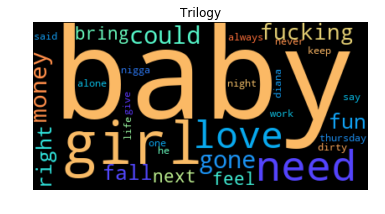

In [52]:
import matplotlib.pyplot as plt
def lyrWC(str1,bck_color,words_color,num_words,stop_words,wctitle):
    ### Creates a wordcloud our of a string of lyrics ###
    wc = wordcloud.WordCloud(background_color=bck_color,colormap=words_color,max_font_size= 150,collocations=False, random_state=42,max_words=num_words,stopwords=stop_words)
    plot1 = wc.generate(str1)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(wctitle)
    return plot1
#alb_df['Lyrics'].apply(lyrWC,args=('black','rainbow',30,stopWords,'Song'))
TrilWC = lyrWC(alb_df['Lyrics']['Trilogy'],'black','rainbow',30,stopWords,'Trilogy')
TrilWC.to_file('TrilogyWC.png')

In [ ]:
wc = wordcloud.WordCloud(background_color = "black",colormap = "rainbow",max_font_size= 150,collocations=False, random_state=42,max_words=40,stopwords=stopWords)
import matplotlib.pyplot as plt
for n in alb_df.index:
    wc.generate(alb_df.loc[n,'Lyrics'])
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(n)


In [53]:
from textblob import TextBlob
pol = []
sub = []
for n in range(0,len(clean_df.index)):
    pol.append(TextBlob(clean_df.loc[n,"Lyrics"]).sentiment.polarity)
    sub.append(TextBlob(clean_df.loc[n,"Lyrics"]).sentiment.subjectivity)
clean_df['Polarity'] = pol
clean_df['Subjectivity'] = sub

In [54]:
import numpy as np
clean_df['Repetitiveness'] = 1- clean_df['%Unique']
clean_df['logStreams'] = np.log(clean_df['Streams'])

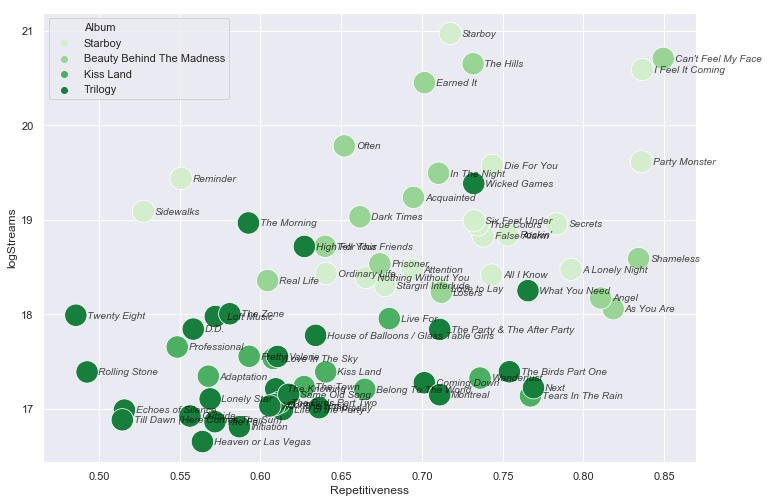

In [59]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot1 = sns.scatterplot(x='Repetitiveness',y='logStreams',data=clean_df,hue='Album',s=500,palette="Greens")
plt.ylabel('logStreams')
for n in clean_df.index:
    x1 = clean_df.loc[n,'Repetitiveness']
    y1 = clean_df.loc[n,'logStreams']
    plot1.text(x1+.007,y1+.007,df.loc[n,'Song'],fontsize=10,va='center_baseline',ha='left',color='black',style='oblique',alpha=.7)

In [33]:
list1 = []
for w in clean_df['WordCount']:
    for x in w:
        if len(x) > 4 and w[x]>10:
            print ((x),":",(w[x]))

don't : 20
paranoid : 14
loves : 17
false : 22
alarm : 22
rocking : 15
secrets : 12
you're : 13
talking : 17
colors : 23
under : 19
paper : 11
loves : 12
learned : 12
better : 12
we're : 18
apart : 12
you're : 12
looking : 12
attention : 16
ain't : 21
ordinary : 26
nothing : 56
without : 11
would : 18
coming : 60
about : 23
friends : 13
often : 27
fucked : 13
that's : 12
touching : 14
we're : 11
can't : 14
always : 21
there : 18
don't : 11
heart : 11
times : 16
somebody : 36
belong : 12
precious : 25
little : 24
diamond : 24
leave : 12
thang : 16
don't : 13
tried : 12
there : 15
bring : 11
money : 24
bring : 16
always : 13
coming : 12
thursday : 21
don't : 16
dirty : 19
diana : 20
'cause : 21
dancing : 12


In [66]:
plot1.get_figure().savefig('Repetitive_Logstreams.png')